# Lab One: Visualization and Data Preprocessing

## Authors: Jethin Abraham, Laurie Harris, Daniel Higdon & John Nelson



### Business Understanding

The purpose of this dataset is to describe the operational performance of domestic U.S. airlines flights in terms of delays and cancellations. The data collected describes flights during 2015, flown by the operating carrier. The operating carrier is indicated by the International Air Transport Association, or IATA, two letter carrier code. These codes are less recognizable than the common brand names, so we will provide a table detailing which code relates to which airline brand in the "Data Meaning Type" section. The distinction between "operating" and "marketing" carrier is an important one in the airline industry, but that will be discussed in more detail in the "Data Quality" section.

The practical use of this dataset is to help describe flight delays. To identify this, we will focus on arrival delays (as opposed to departure delays) as they are more impactful to a customer's plans and possible flight connections. To identify a flight as delayed, we will use the industry standard of a flight arriving 15 minutes or later than it's scheduled arrival time is determined to be "delayed" (why is the industry standard not more than 0 minutes after it's scheduled arrival time...good question). A good prediction algorithm would be able to predict the likelihood that a flight was delayed depending on the airline and route. 

### Data Meaning Type

In this section we will provide a quick table to identify IATA carrier codes with more common brand names of the airlines. Additionally, we will provide a descripton of every field in the data set as well as its data type.

#### Airline Codes and Names

 - AA - American Airlines (later merged with US - US Airways)
 - AS - Alaska Airlines (later merged with VX - Virgin America)
 - B6 - JetBlue Airways
 - DL - Delta Air Lines
 - EV - Atlantic south East Airlines (a carrier that leases out much of its capacity)
 - F9 - Frontier Airlines
 - HA - Hawaiian Airlines
 - MQ - American Eagle Airlines (a subsidiary of American Airlines)
 - NK - Spirit Air Lines
 - OO - SkyWest Airlines (a carrier that leases out much of its capacity)
 - UA - United Airlines
 - US - US Airways (later merged with American Airlines)
 - VX - Virgin America (later megred with Alaska Airlines)
 - WN - Southwest Airlines

An index of these airlines codes will be made for ease in interpretting plots when generating visualizations based on airline code. 

In [2]:
import pandas as pd

airlines = pd.read_csv('data/airlines.csv')

airlines_full_name = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
airlines_full_name

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

#### Data Fields Definitions and Types
 - Year - an integer value representing the year the flight departed
 - Month - an integer value representing the month the flight departed
 - Day - an integer value representing the day of the month the flight departed
 - Day_Of_Week - an integer value representing the day of week, 1 = Monday, 7 = Sunday (the rest follow sequentially from one, so 2 = Tuesday, 3 = Wednesday, etc.)
 - Airline - String field showing the IATA code for the airline that operated the flight
 
 - Flight_Number - an integer value identifying the flight, it is rarely, but sometimes repeated, on a single day for a single airline
 
 - Tail_number - an alpha-numeric string value that uniquely identifies the aircraft which operated the flight
 
 - Origin_airport - a string field showing the 3 letter airport code from which the flight departed
 
 - Destination_airport - a string field showing the 3 letter airport code of the arrivale airport
 
 - Scheduled_departure - an integer value of the scheduled departure time (24-hour clock)
 
 - Departure_time - an integer value of the actual departure time (24-hour clock)
 
 - Departure_delay - an integer value representing the departure delay in minutes, negative values represent flights that departed early
 
 - Taxi_out - an integer value representing the time in mintues it took the aircraft to travel from the departing gate to the the runway for take-off
 
 - Wheels_off - an integer value reprsenting the time (24-hour clock) that the plane's wheel actually left the ground
 
 - Scheduled_time - an integer value representing the time in minutes that was scheduled for the flight's travel
 - Elapsed_time - an integer value representing the actual time in minutes that elapsed during the flight
 - Air_time - an integer value representing the time in minutes the flight was in the air
 - Distance - an integer value representing the great circle miles the aircraft traveled (great circle miles are the distance it takes to travel around a sphere, or in this case, the globe)
 - Wheels_on - an integer value representing the time (24-hour clock) that the flight's wheels touched down at the arrival airport
 - Taxi_in - an integer value representing the minutes it took for the flight to travel from "wheels_on" to arriving at the arrival gate
 - Scheduled_arrival - an integer value representing the time (24-hour clock) that the flight was scheduled to arrive
 - Arrival_time - an integer value representing the actual time (24-hour clock) that the flight arrived at the arrival gate
 - Arrival_delay - an integer value representing the delay between actual arrive and scheduled arrival, early arrivals are reprsented by negative values
 - Diverted - a boolean value indicating whether or not the flight was diverted. 0 means the flight was not diverted, 1 means that the flight was diverted. Many things can cause diversions, but bad weather at the arrival airport is the most common cause.
 - Cancelled - a boolean value indicating whether or not the flight was cancelled. 0 means the flight was not cancelled, 1 means that the flight was cancelled.
 - Cancellation_reason - a string value showing the code for the reason a flight was cancelled. A = Airline/Carrier; B = Weather; C = National Air System; D = Security. A blank value means that the flight was not cancelled for any reason.
 - Air_system_delay - an integer value representing the minutes that a flight was delayed due to the air traffic control system. A missing value means that the flight was delayed 15 minutes or less.
 - Security_delay - an integer value representing the minutes that a flight was delayed due security at the airport. A missing value means that the flight was delayed 15 minutes or less.
 - Airline_delay - an integer value representing the minutes that a flight was delayed due to an airline issue. A missing value means that the flight was delayed 15 minutes or less.
 - Late_aircraft_delay - an integer value representing the minutes that a flight was delayed due to a late arriving aircraft. A missing value means that the flight was delayed 15 minutes or less.
 - Weather_delay - an integer value representing the minutes that a flight was delayed due to weather. A missing value means that the flight was delayed 15 minutes or less.


### Data Quality

As mentioned in an earlier section, the data collected describes flights during 2015. One thing to note is that due to US Department of Transportation (DOT) regulations, any airline with at least one percent of total domestic scheduled-service passenger revenues must report on-time data. This means that while all of the major airlines are covered in this data set, it does not describe all of the domestic air travel performance during 2015.

Additionally, the data is reported in terms of operating carrier. A common practice, especially among larger air carriers, is to supplement their service and route network by leasing air service from smaller carriers who have smaller aircraft better suited to serving less populous cities. This means that there is a small difference between between the operational performance this data describes and how a consumer may think of an airline's operational performace. An example will help illustrate the point.

SkyWest Airlines (carrier code "OO") partners with United Airlines, Delta Air Lines, American Airlines, and Alaska Airlines to provide leased air service under each of those various larger carriers' brands. Additionally, smaller, lease focused carriers like SkyWest will sometimes fly under their own brand. So in the dataset used in this project a delayed flight may have a carrier code of "OO", which identifies that it was a SkyWest flight, even though it was flown under United Airlines brand, and the customers who flew on that flight had purchased a United Airlines ticket. The dataset uses the IATA (International Air Transport Association) code to identify the unique airlines. While this makes sense for an industry dataset, it may not be immediately intuitive for most consumers.

Finally, as a result of how regulated the airline industry is, the reporting of this data is highly structured and mandated by the DOT. Additionally, because this information must be reported regularly and in a timely basis, the collection of the data is automated in most cases. The end result is that the data set has fewer occurences of erroneous responses, or missing responses than many others. There are a few cases where the airport is not known. Because of the variation depending on many different factors, we did not feel that imputing a value, or erroneously assigning an airport to that record, made sense. We have left these as blank. One of the few concerns with the data is that several fields in the set are only triggered if a delay occurs. For flights in which a delay did not occur, the field is left "blank". For the purposes of analysis, this is the equivalent of a zero minute delay. The fields in which this is a concern are listed below:

 - Cancellation_reason
 - Air_system_delay
 - Security_delay
 - Airline_delay
 - Late_aircraft_delay
 - Weather_delay
 
To clean the data we will replace all blank values with a 0.

In [6]:
###reading in the data
df = pd.read_csv('data/flights.csv', low_memory=False)
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


As we can see in the first few rows of the dataset read in above, the columns at the far right of the dataset have been read in as "NaN", or "Not a Number" in the cases of missing values. We will now replace those with 0.

In [10]:
df.fillna(0, inplace=True)
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,-17.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,-13.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


As we can see, the missing values have been replaced with 0s. Because the only reason a numerical field should have a missing value in this data set is due to the value being the equivalent of 0, we do not have specify rows or columns, and can accomplish this in a very simple line of code, as seen above.

The final concern with the data is not related to the quality, but rather the size. In its raw form the dataset has 5,819,079 records and 31 columns. While such a dataset is not so large that it could not be used, it is too large to post on our GitHub repository.  Therefore, we decided to focus on a subset of airports to make the visualizations easier to extract meaning from, and to ease the computational burden. The airports we chose to focus on were:

 - SFO (San Francisco International Airport)
 - MDW (Chicago Midway International Airport)
 - LGA (Laguadia International Airport, New York)
 
These airports represented several advatages as a subset. One is that they easy represent a different region of the country (West, Central, East). Another is that they are large airport with many daily flights from all over the country. This means that our data subset will have a sample of flights from many regions. Finally, this subset of airports is served by a wide range of airlines. United Airlines has a "hub" operation (a large number of flights going in and out of the same airport timed such that the flights can "feed" each other) at SFO. Southwest Airlines, while not techincally a hub carrier, has a significant operation at MDW. And just about all major US airlines have significant operations to and from LGA as it is one of the main airports serving New York city.

To accomplish this, we are first going to import all of the libraries that we will use throughout the remainder of this analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Then we add an indicator variable to our dataset to for flights which meet the industry standard to be considered "delayed", which is more than 15 minutes after the scheduled arrival time:

In [15]:
df.loc[df['ARRIVAL_DELAY']>15,'DELAYED'] = 1
df.loc[df['ARRIVAL_DELAY']<=15,'DELAYED'] = 0
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


Before we subset our data there is one last data quality issue to address. The data is generally very clean, and error was made when the raw data was formatted. For the month of October the three letter airport codes are shown as five digit numbers. To correct for this we looked up the which numbers correspond to the airports we are going to subset our data for and will replace the numbers with the more common three letter code that every month has.

In [11]:
df['ORIGIN_AIRPORT'].replace(['14771','13232','12953'],['SFO','MDW','LGA'],inplace=True)

Now we subset this to only include the following origin airports: SFO, MDW, and LGA.

In [13]:
a=['SFO','MDW','LGA']

df_sub=df[df['ORIGIN_AIRPORT'].isin(a)]

df_sub.DIVERTED.unique(),df_sub.CANCELLED.unique()

del df_sub['CANCELLED'],

del df_sub['DIVERTED'],

del df_sub['CANCELLATION_REASON']

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358876 entries, 2 to 5819041
Data columns (total 29 columns):
YEAR                   358876 non-null int64
MONTH                  358876 non-null int64
DAY                    358876 non-null int64
DAY_OF_WEEK            358876 non-null int64
AIRLINE                358876 non-null object
FLIGHT_NUMBER          358876 non-null int64
TAIL_NUMBER            358876 non-null object
ORIGIN_AIRPORT         358876 non-null object
DESTINATION_AIRPORT    358876 non-null object
SCHEDULED_DEPARTURE    358876 non-null int64
DEPARTURE_TIME         358876 non-null float64
DEPARTURE_DELAY        358876 non-null float64
TAXI_OUT               358876 non-null float64
WHEELS_OFF             358876 non-null float64
SCHEDULED_TIME         358876 non-null float64
ELAPSED_TIME           358876 non-null float64
AIR_TIME               358876 non-null float64
DISTANCE               358876 non-null int64
WHEELS_ON              358876 non-null float64
TAXI_IN      

Finally, we export our dataframe out to a .csv file to use on our GitHub repository.  The original dataset in its entirity can be found at https://www.kaggle.com/usdot/flight-delays/data

In [14]:
#Writing data to csv

df_sub.to_csv("data/Airline_Dataset_LGA_MDW_SFO.csv", sep=',')

The data subset is read in from our GitHub repository.  At this point in the notebook, all work is repeatable internally.  To properly subset the original dataset as shown above, the flights.csv file put be downloaded from the link provided and placed in the data folder of this file structure.

In [2]:
df2 = pd.read_csv('data/Airline_Dataset_LGA_MDW_SFO.csv', low_memory=False)
df2.head(10)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,11.0,806,811.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,2015,1,1,4,DL,806,N3730B,SFO,MSP,...,6.0,602,610.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,...,3.0,545,532.0,-13.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17,2015,1,1,4,UA,1197,N78448,SFO,IAH,...,7.0,626,619.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92,2015,1,1,4,UA,1532,N77066,SFO,DEN,...,11.0,857,923.0,26.0,7.0,0.0,19.0,0.0,0.0,1.0
5,155,2015,1,1,4,WN,526,N742SW,SFO,DEN,...,7.0,925,923.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0
6,190,2015,1,1,4,WN,597,N768SW,SFO,ATL,...,8.0,1340,1324.0,-16.0,0.0,0.0,0.0,0.0,0.0,0.0
7,191,2015,1,1,4,UA,1158,N73445,SFO,ORD,...,13.0,1217,1213.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,195,2015,1,1,4,UA,1224,N87531,SFO,LAX,...,9.0,728,717.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0
9,202,2015,1,1,4,US,610,N560UW,SFO,PHX,...,17.0,854,857.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


### Simple Statistics

To get a feel for our data we are going to review some simple statistics of our subsetted dataset.

In [16]:
df2_delayed = df2[df2.DELAYED == 1]

np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.2f}'.format
print(df2_delayed[['DEPARTURE_DELAY','ARRIVAL_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].describe())

       DEPARTURE_DELAY  ARRIVAL_DELAY  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count         71500.00       71500.00          71500.00        71500.00   
mean             57.86          60.78             11.80            0.04   
std              64.17          60.17             23.76            1.54   
min             -20.00          16.00              0.00            0.00   
25%              20.00          25.00              0.00            0.00   
50%              41.00          40.00              1.00            0.00   
75%              76.00          74.00             17.00            0.00   
max            1496.00        1498.00            676.00          196.00   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count       71500.00             71500.00       71500.00  
mean           18.04                28.85           2.05  
std            41.48                47.13          16.86  
min             0.00                 0.00           0.00  
25%             0.00         

Before interpreting the simple statistics it is important to note (once again) that our data has been subsetted to only include flights that had an arrival delay of greater than 15 minutes. So if we were to look at the mean delay of flights from our three airports (60.78 minutes), it is not the average delay of all flights from these airports. That would be much lower due to flights that weren't delayed or arrived early.

With that said, one interesting, although not surprising, aspect of the statistics is how closely tied mean departure delay and arrival delay are. The mean departure delay was 57.86 minutes while the mean arrival delay was 60.78 minutes. While there are many variables at play, this is a bit of a surprising result. Once a flight's departure is delayed there are some limited options in the pilot's control to "make up" for the delay in the air. One is to simply fly more quickly. This is not done as standard practice as it burns more fuel (and the planes do not always have significant amounts of spare fuel loaded, in fact in practice they want as little fuel loaded onto the plane as is possible without compromising safety and more fuel makes the plane heavier, and therefore less fuel efficient, and therefore more expensive to operate), and for other reasons which are beyond the scope of this analysis to detail here.

Another aspect of the summary statistics that jumps out is mean delay attributed to a late arriving aircraft. The mean delay is 28.85 minutes, which is by far the longest mean delay among the possible causes. The next closest is "airline delay" at 18.04 minutes. We believe that the most likely explanation for this large gap is that our subset of airports are very busy airports. That results in congested air space which can cause arrival delays due to air traffic as even a large airport's supply of runways can be outpaced by the "demand" for landings during peak periods.

Far and away the shortest mean cause of delays was security, at 0.04 minutes. Perhaps anyone who has gone through security at these airports might disagree with the accounting of delay causes?

To gain a better understanding of the distribution for each type of delay, a boxplot is shown below.  Notice that the x axis is at a log scale, indicating the the data is greatly right-skewed.  Therefore, we can presume that there are a large number of delays which take a short period of time beyond the 15 minute threshold and a smaller number of delay that are extremely long.

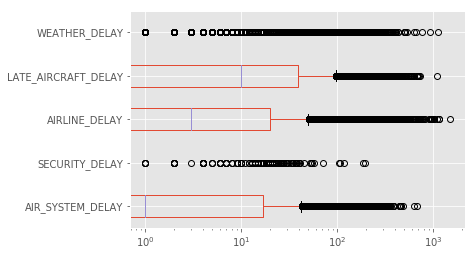

In [17]:
plt.style.use('ggplot')

ax = df2_delayed[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].boxplot(vert=False)
ax.set_xscale('log')

### Visualize Attribute

#### Types of Delays

It is important to figure out which type of delay plays a more integral part to an arrival delay.  We will first investigate by seeing a breakdown of delay type as a summation of time as well as a count of times the delay type occurred. 

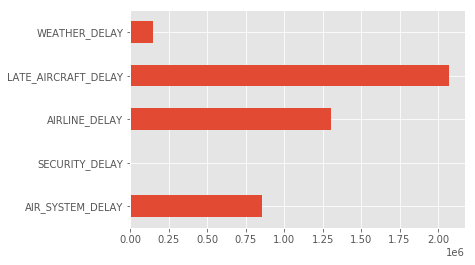

In [18]:
b = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY', 
    'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df2_aggr = df2[b].sum()

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
df2_aggr.plot(kind='barh')

In [19]:
print(df2_aggr)

AIR_SYSTEM_DELAY       859623.00
SECURITY_DELAY           2875.00
AIRLINE_DELAY         1301642.00
LATE_AIRCRAFT_DELAY   2071828.00
WEATHER_DELAY          147335.00
dtype: float64


As shown in the histogram above, an aircraft arriving late is the biggest culprit with an airline delay followed behind at roughly 60% its total minutes.

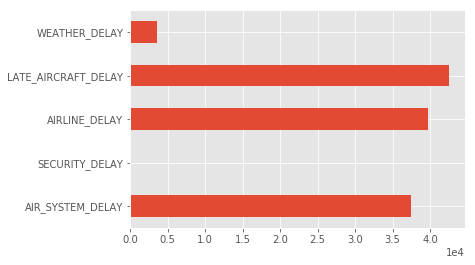

In [20]:
df2_count = df2[b][df2 > 0].count()

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
df2_count.plot(kind='barh')

In [21]:
print(df2_count)

AIR_SYSTEM_DELAY       37400
SECURITY_DELAY           124
AIRLINE_DELAY          39649
LATE_AIRCRAFT_DELAY    42514
WEATHER_DELAY           3554
dtype: int64


We see a different trend in the counts of the types of delays.  Late aircraft delays, airline delays, and air system delays are all much closer to each other than the summation of total delay time.  Showing that the length of delays for a late aircraft tend to last longer than other types of delays.  And on the other side of the spectrum, we can presume air system delays average short time when compared to the other types.  This is consistent with what was calculated in their summary statistics.

#### Times of Arrival and Departure

The time at which a delay occurs can also play a significant role.  To investigate we will plot arrival delay times against both time of arrival and time of departure to see if there is an apparent trend.  We will plot them using hallow circles to see greater concentrations of data points.

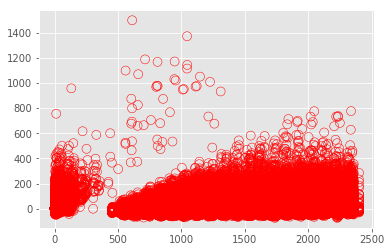

In [22]:
plt.scatter(df2['DEPARTURE_TIME'],df2['ARRIVAL_DELAY'], s=80, facecolors='none', edgecolors='r')
plt.show()

We see that as time progresses throughout the day, arrival delays trend up.  This makes sense because if an airline or plane is behind schedule earlier in the day, it is harder to catch up and the time behind schedule can compound into further and further behind schedule.

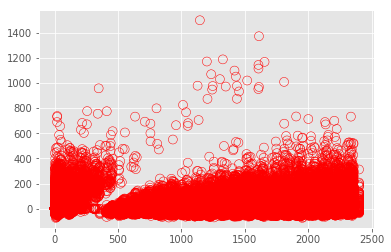

In [23]:
plt.scatter(df2['ARRIVAL_TIME'],df2['ARRIVAL_DELAY'], s=80, facecolors='none', edgecolors='r')
plt.show()

We see a consistent trend with arrival time.  Since departure time and arrival time are highly correlated seeing as arrival time must be later than departure time, pending travel time, this trend make practical sense. 

#### Airline Carrier

A new variable will be made separating delays from longer delays to those which stay under 45 minutes to visualize the sereverity of the delay. 

In [24]:
df2['DELAY_LENGTH'] = pd.cut(df2.ARRIVAL_DELAY,[-1e6,15,45,1e6],3,labels=['>15','>45','<45']) 

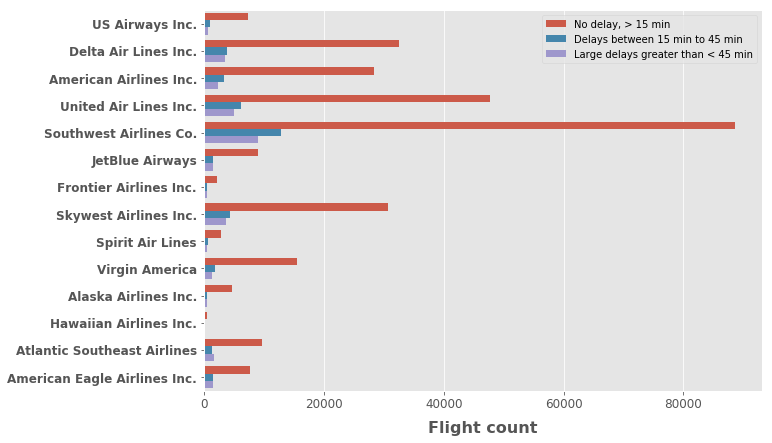

In [25]:
#_Vizualization of Flights and their delays

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LENGTH', data=df2)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [airlines_full_name[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('No delay, > 15 min')
L.get_texts()[1].set_text('Delays between 15 min to 45 min')
L.get_texts()[2].set_text('Large delays greater than < 45 min')
plt.show()

### Explore Joint Attributes

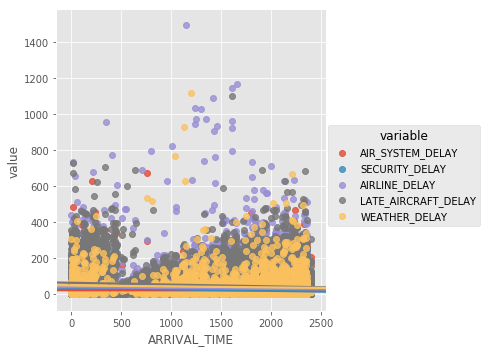

In [26]:
cmap = sns.diverging_palette(220,10,as_cmap=True)

df2_long = pd.melt(df2, id_vars=['ARRIVAL_TIME'], value_vars=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                                                          'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                                                          'WEATHER_DELAY'])
sns.lmplot('ARRIVAL_TIME','value',data=df2_long[df2_long.value > 0],
           hue='variable')
plt.show()

In [27]:
# 1. Date
df2['DATE'] = pd.to_datetime(df2[['YEAR','MONTH','DAY']], yearfirst=True)

# 2. Month name
month_dict={
    1:  '01- January',
    2:  '02- February',
    3:  '03- March',
    4:  '04- April',
    5:  '05- May',
    6:  '06- June',
    7:  '07- July',
    8:  '08- August',
    9:  '09- September',
    10: '10- October',
    11: '11- November',
    12: '12- December'
}
df2['MONTH_DESC'] = df2['MONTH'].apply(lambda m: month_dict[m])

# 3. Day of the week name
dow_dict = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}
df2['DOW_DESC'] = df2['DAY_OF_WEEK'].apply(lambda d: dow_dict[d])

df2['WEEK_NAME_DESC']=df2.DAY_OF_WEEK.map(str)+'-'+df2.DOW_DESC

# 4. Airline name
df2['AIRLINE_DESC'] = df2['AIRLINE'].apply(lambda a: airlines_full_name[a])



df2.head()


,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,DELAY_LENGTH,DATE,MONTH_DESC,DOW_DESC,WEEK_NAME_DESC,AIRLINE_DESC
0,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,0.00,0.00,0.00,0.00,>15,2015-01-01,01- January,Thursday,4-Thursday,US Airways Inc.
1,5,2015,1,1,4,DL,806,N3730B,SFO,MSP,...,0.00,0.00,0.00,0.00,>15,2015-01-01,01- January,Thursday,4-Thursday,Delta Air Lines Inc.
2,8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,...,0.00,0.00,0.00,0.00,>15,2015-01-01,01- January,Thursday,4-Thursday,American Airlines Inc.
3,17,2015,1,1,4,UA,1197,N78448,SFO,IAH,...,0.00,0.00,0.00,0.00,>15,2015-01-01,01- January,Thursday,4-Thursday,United Air Lines Inc.
4,92,2015,1,1,4,UA,1532,N77066,SFO,DEN,...,19.00,0.00,0.00,1.00,>45,2015-01-01,01- January,Thursday,4-Thursday,United Air Lines Inc.


In [28]:
pvt_scheduled_airline_date = df2.pivot_table(index="MONTH_DESC",columns="AIRLINE_DESC",values="SCHEDULED_DEPARTURE",aggfunc=lambda x: x.count())
pvt_scheduled_airline_date.head()

AIRLINE_DESC,Alaska Airlines Inc.,American Airlines Inc.,American Eagle Airlines Inc.,Atlantic Southeast Airlines,Delta Air Lines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,Skywest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,US Airways Inc.,United Air Lines Inc.,Virgin America
MONTH_DESC,,,,,,,,,,,,,,
01- January,451.00,2079.00,1297.00,1275.00,3060.00,222.00,62.00,991.00,3574.00,8442.00,341.00,1437.00,4464.00,1462.00
02- February,419.00,1880.00,1214.00,1153.00,2923.00,197.00,56.00,924.00,3128.00,7574.00,308.00,1365.00,4117.00,1299.00
03- March,500.00,2135.00,1362.00,1179.00,3554.00,246.00,62.00,1035.00,3514.00,9241.00,339.00,1546.00,4803.00,1488.00
04- April,492.00,2067.00,1319.00,965.00,3284.00,242.00,60.00,1006.00,3231.00,9253.00,330.00,1516.00,4713.00,1488.00
05- May,504.00,2106.00,1215.00,996.00,3272.00,278.00,62.00,1012.00,3099.00,9455.00,341.00,1577.00,5099.00,1546.00


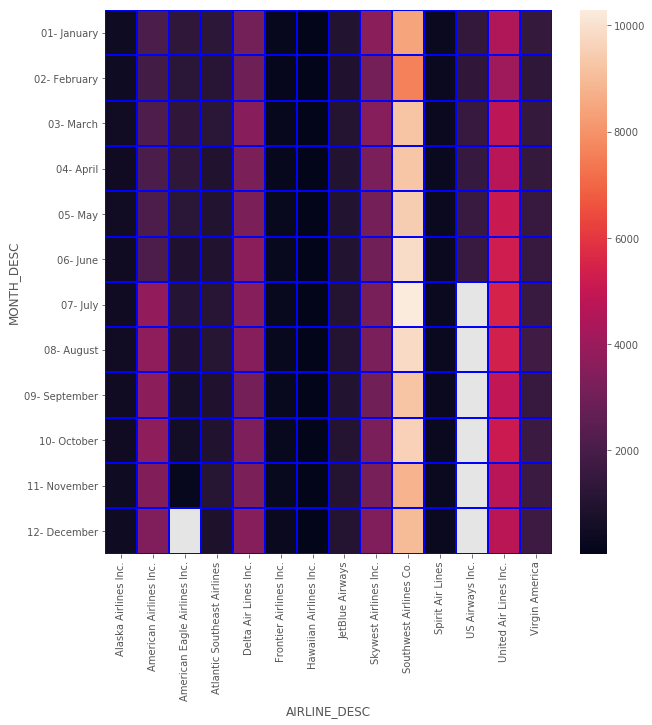

In [29]:
#Scheduled Departures by Airlines by Month

fig = plt.figure(figsize=(10,10))
sns.heatmap(pvt_scheduled_airline_date, linecolor="blue", linewidths=1)

The above heatmap shows the number of scheduled departures by airline by month.  We observe that Southwest Airlines has the highest number for each month.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e3c7e10>], dtype=object)

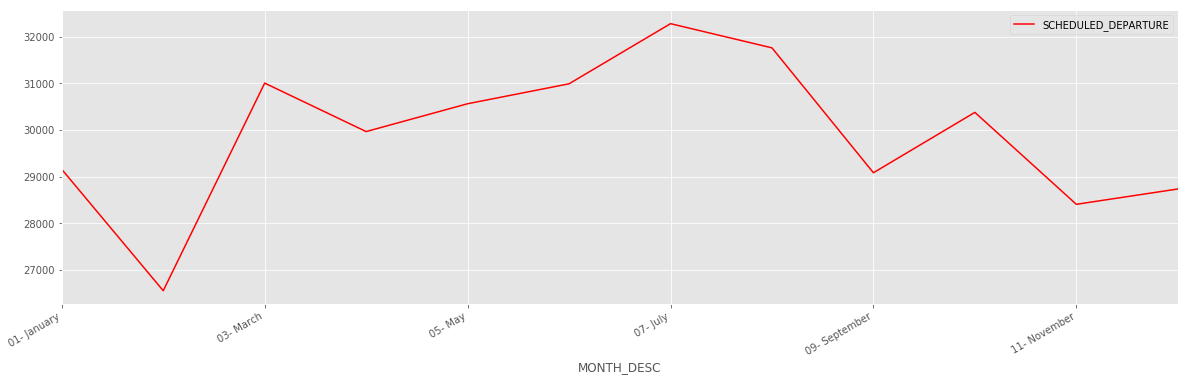

In [30]:
#Scheduled Departure by Months

df_busyday = pd.DataFrame(df2.groupby('MONTH_DESC').count()['SCHEDULED_DEPARTURE'])
#df_busyday = df_busyday.sort(['SCHEDULED_DEPARTURE'],ascending = 1)
df_busyday.head()
df_busyday.plot(kind='line',subplots=True,color='r',figsize=(20,6),legend=True)

The seasonal pattern in scheduled departures is shown above with spikes in the summer months (June, July, August) and lows during the winter months (December, January, February).  Seasonal patterns could influence flight delays due to congestion during the higher volume of flights during the summer months.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dfda8d0>], dtype=object)

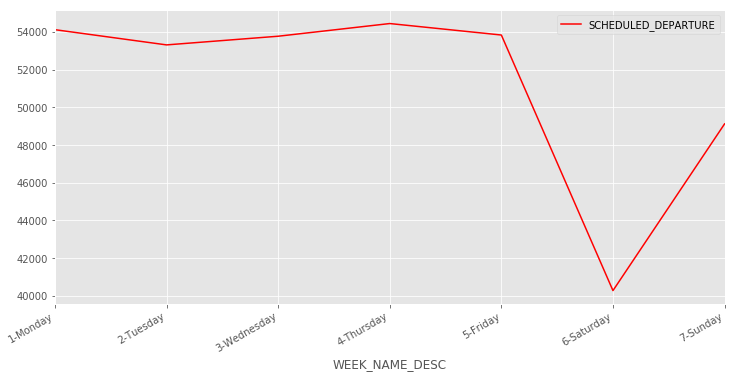

In [31]:
#Scheduled Departures by Week Days

df_busyday = pd.DataFrame(df2.groupby('WEEK_NAME_DESC').count()['SCHEDULED_DEPARTURE'])
#df_busyday = df_busyday.sort_values(['SCHEDULED_DEPARTURE'],ascending = 1)
df_busyday.head()
df_busyday.plot(kind='line',subplots=True,color='r',figsize=(12,6),legend=True)

The daily pattern of scheduled departures shows higher volume on weekdays and lower volume on weekends. These daily patterns could also influence delays.

### Explore Attributes and Class

This dataset could be very useful in helping design a model to predict the likelihood that a given flight would result in a delay.  We observe that for all flights originating from San Francisco, Chicago Midway, or New York LaGuardia, approximately 20% have an arrival delay exceeding 15 minutes.

In [32]:
delay_rate = df2.DELAYED.sum() / df2.DELAYED.count()
delay_rate

0.19923316131477167

By examining the attributes in the dataset, we can build insights into which variables could be important predictors of arrival outcome - whether the flight can be considered on-time or delayed.  We would like to initially explore the arrival outcome by focusing on the originating airport, airline, and day of the week.  A final predictive model will certainly include additional attributes from the dataset. In the following section on New Features we will explore whether it may appropriate to transform some of the continuous variables into new features or levels to further enhance our analysis.

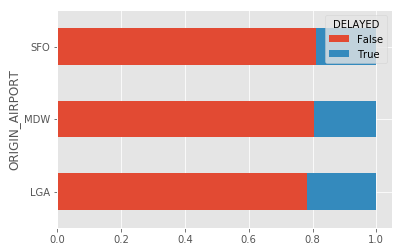

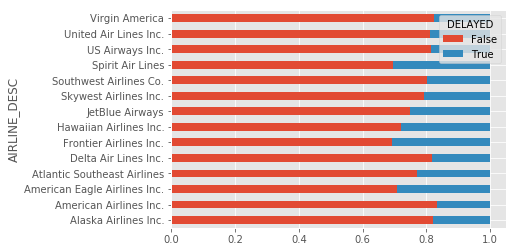

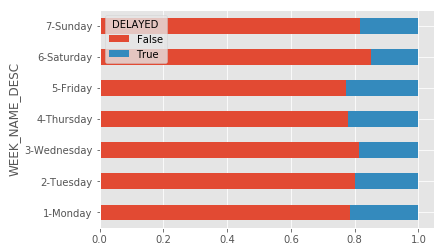

In [33]:
#code to create stacked bar charts adapted from Dr. Larson's master Jupyter notebooks for MSDS 7349
#visualize airport, airline, day of week
#exploration of destination airport, total flight distance, and calendar season could also be important
#attributes, although difficult to vizualize
#Potential new features are later explored to determine if our analysis would be further enhanced

delays_origin = pd.crosstab([ df2['ORIGIN_AIRPORT']],df2.DELAYED.astype(bool))
delays_airline = pd.crosstab([ df2['AIRLINE_DESC'] ],df2.DELAYED.astype(bool))
delays_dayofweek = pd.crosstab([ df2['WEEK_NAME_DESC'] ],df2.DELAYED.astype(bool))

origin_rate = delays_origin.div(delays_origin.sum(1).astype(float),axis=0) # normalize the value
origin_rate.plot(kind='barh',stacked=True)
airline_rate = delays_airline.div(delays_airline.sum(1).astype(float),axis=0) # normalize the value
airline_rate.plot(kind='barh',stacked=True)
dayofweek_rate = delays_dayofweek.div(delays_dayofweek.sum(1).astype(float),axis=0) # normalize the value
dayofweek_rate.plot(kind='barh',stacked=True)

If we keep the overall 20% delay benchmark in mind, using the plots above, we can easily see how close the different values for each attribute are to that benchmark.  As an example, in the day of the week plot, we notice that the weekend days (days 6 and 7) and Wednesday (day 3) are the days of the week with lower likelihood of delays while the higher likelihood is observed for the remaining weekdays (excluding Wednesday).  This pattern seems intuitive when we consider the customary cadence of business and leisure travel.  Higher volume of travel at the beginning and end of the week will likely result in tighter flight schedules and any single delay has potential to create cascading delays throughout the day.

### New Features

The raw dataset is very large and reported at a granular level. As such there are significant differences between the different airports, time of day, etc. One way to gain more information, as well as making the data set easier to handle, would be to group variables in a logical manner:

 - A field that shows the geographic region of the origin and destination airports (the idea being that some regions of the country are more likely to have weather that is difficult to operate in, and therefore more likely to have delayed flights
 - A variable which groups flights into short haul, medium haul and long haul (0-500 miles, 501-1000 miles, and 1001 miles as a starting suggestion). This has the benefit of allowing to do some feature reduction without completely losing the length of haul information provided by the distance field)
 - A field grouping the scheduled departure time (morning, afternoon, evening, late evening, red-eye). Like with the distance grouping, it allows for some feature reduction while not losing all of the information provided by the scheduled departure time. Also, the later in the day a flightis the more likely it is to have a late arriving aircraft of some other issue that causes a delay. Also, many airlines "bank" their flights, which means that they have many departing around the same time so that they can connect passengers. But this causes airport congestion which can lead to delays.
 
This has the potential of helping us in two ways. One, as mentioned, is to allow us to aggregate observations in a logical way to pick out trends that can be generalized. As an example, knowing that a flight to White Plains, New York (airport code: HPN) is not likely to be useful to many people. However, knowing that flights to the northeast, especially during winters, are more likely to be delayed when coming from the Midwest, would be useful information for a large number of people.

The second benefit is that it could serve as data reduction. Rather than predicting how flights perform between all the different permutations of airports across the country, predicting how they perform between a handful of different regions would be much cheaper computationally. 

To accomplish this, we will add the new features detailed in the bullet points above.

Because we are going to add the new features to the raw dataset, rather than to the subsetted dataset, we are going to use the original dataset that was loaded at the beginning of this notebook.

Reading in another data set to identify the state that each airport is in. This will later be used to group the airports by region. Additionally, we are renaming the columns to make the merge (seen later) easier.

In [3]:
df_orig = pd.read_csv('data/airports.csv', low_memory=False)

df_orig.rename(columns={'IATA_CODE':'ORIGIN_AIRPORT'},inplace=True)
df_orig2 = df_orig.loc[:,['ORIGIN_AIRPORT','STATE']]
df_orig2.rename(columns={'STATE':'Orig_State'},inplace=True)

Next we load the dataset again, save it as a different dataframe, and rename the column so that we can eventually merge on the destination airport.

In [4]:
df_dest = pd.read_csv('data/airports.csv', low_memory=False)

df_dest.rename(columns={'IATA_CODE':'DESTINATION_AIRPORT'},inplace=True)
df_dest2 = df_dest.loc[:,['DESTINATION_AIRPORT','STATE']]
df_dest2.rename(columns={'STATE':'Dest_State'},inplace=True)

Finally, we merge all of the data frames together.

In [19]:
df3 = pd.merge(df,df_orig2,how='left',on=['ORIGIN_AIRPORT'])
df4 = pd.merge(df3,df_dest2,how='left',on=['DESTINATION_AIRPORT'])

Now we create some list variables grouping each state into one of 5 geographic regions.

 - West = Western United States
 - MW = Midwest
 - NE = Northeast
 - SoCen = South Central
 - SE = Southeast
 
We then use a nested Numpy where to group the Origin and Destination airports into the appropriate regions.

In [20]:
West = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NM', 'NV', 'OR', 'UT', 'WA', 'WY']
MW = ['IL', 'IN', 'MI', 'OH', 'KS', 'MN', 'MO', 'IA', 'WI', 'ND', 'SD', 'NE']
NE = ['NJ', 'NY', 'VT', 'PA', 'VA', 'WV', 'CT', 'MD', 'RI', 'NH', 'MA', 'ME', 'DE', 'DC', 'US']
SoCen = ['AR', 'OK', 'LA', 'TX']
SE = ['FL', 'GA', 'NC', 'SC', 'AL', 'TN', 'KY', 'MS']
df4['Orig_Rgn'] = np.where(df4.Orig_State.isin(West),'West',
                  np.where(df4.Orig_State.isin(MW),'MW',
                  np.where(df4.Orig_State.isin(NE),'NE',
                  np.where(df4.Orig_State.isin(SoCen),'SoCen',
                  np.where(df4.Orig_State.isin(SE),'SE','unknown')))))

df4['Dest_Rgn'] = np.where(df4.Dest_State.isin(West),'West',
                  np.where(df4.Dest_State.isin(MW),'MW',
                  np.where(df4.Dest_State.isin(NE),'NE',
                  np.where(df4.Dest_State.isin(SoCen),'SoCen',
                  np.where(df4.Dest_State.isin(SE),'SE','unknown')))))

Now we will group each flight by its "length of haul" or "LOH". That is the distance the plane flew between the origin and destination airport.

 - Short Haul = 0 - 500 miles (0-500)
 - Medium Haul = 501 - 1,000 miles (501-1,000)
 - Long Haul = 1,001+ miles (1,001+)

In [21]:
df4['LOH_Grp'] = np.where(df4.DISTANCE < 501,'0-500',
                 np.where(df4.DISTANCE < 1000,'501-1,000','1,001+'))

The last grouping field we will add is for the time of the day that the flight departs. Because there is little slack built into an airline's schedule, often when a flight is delayed it can have a domino effect to all subsequent flights that plane was scheduled to fly. This was explored some in the "Visualize Attributes" section. To make this easier to see, we will group departure times as follows (24-hour clock):

 - 00:00 - 05:00 = Red-Eye
 - 05:01 - 11:00 = Morning
 - 11:01 - 14:00 = Midday
 - 14:01 - 17:00 = Afternoon
 - 17:01 - 21:00 = Evening
 - 21:09 - 24:00 = Late Evening

In [22]:
df4['DepTime'] = np.where(df4.SCHEDULED_DEPARTURE < 501,'Red-Eye',
                 np.where(df4.SCHEDULED_DEPARTURE < 1101,'Morning',
                 np.where(df4.SCHEDULED_DEPARTURE < 1401,'Midday',
                 np.where(df4.SCHEDULED_DEPARTURE < 1701,'Afternoon',
                 np.where(df4.SCHEDULED_DEPARTURE < 2101,'Evening','Late Evening')))))

### Exceptional Work

For the "Exceptional Work" section we are going to explore our data using our newly created additional features.

First we are going to look at the delay rate by our time grouping.

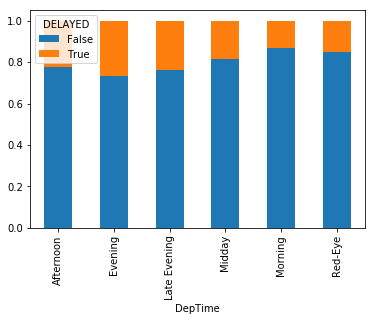

In [23]:
delays_time = pd.crosstab([ df4['DepTime']],df4.DELAYED.astype(bool))

delays_rate = delays_time.div(delays_time.sum(1).astype(float),axis=0)
delays_rate.plot(kind='bar',stacked=True)

We can immediately see that the flights in the "Evening" and "Late Evening" tend to be delayed at higher rates. This begs the question of what causes this? Perhaps it due to those time periods have a large volume of scheduled arrivals and therefore air traffic/airport congestion is causing delays? To answer this we'll look at the count of flights by each time grouping.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x27692fa90>], dtype=object)

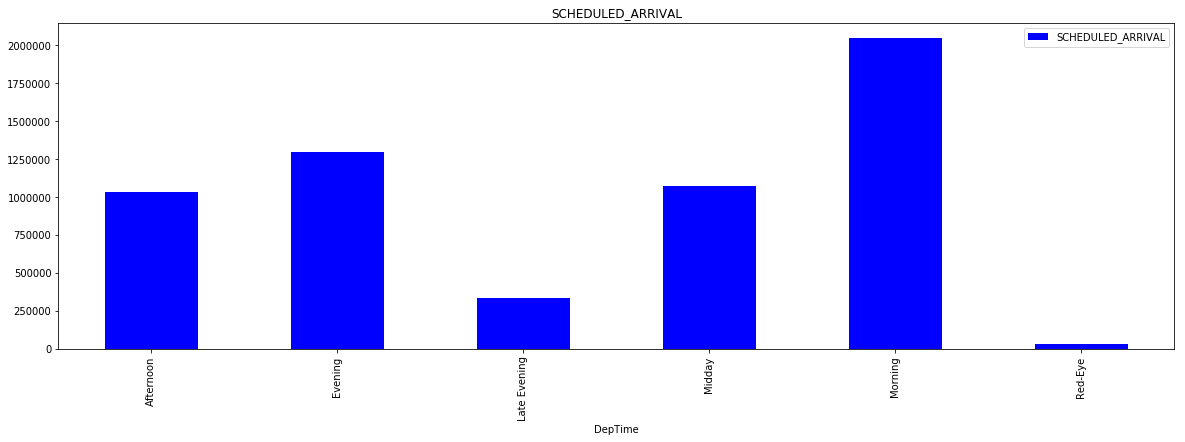

In [12]:
df_delay = pd.DataFrame(df4.groupby('DepTime').count()['SCHEDULED_ARRIVAL'])

df_delay.plot(kind='bar',subplots=True,color='B',figsize=(20,6),legend=True)

From the plot above we se that the "Late Evening" flight in particular are flying at times that should not be that congested. The "Late Morning" and "Afternoon" period have far more flights. If we look at the same data, but in a line chart, the likely cause becomes more clear.

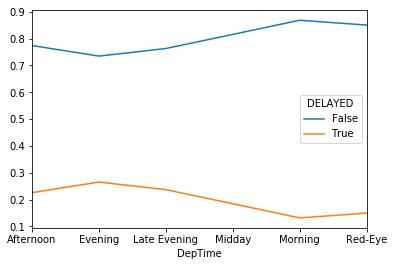

In [24]:
delays_rate.plot(kind='line')

Focusing on the green line, which is the percent of flights delayed by departure time grouping it is clear that the likelihood of a flight being delayed inceases as it gets later in the due. This is likely due to the fact that once a flight is delayed it has a cascading impact on every later flight in the day that plane was scheduled to fly. In other words, once it's behind, it's hard to catch up.

Next we'll look at delays by destination region.

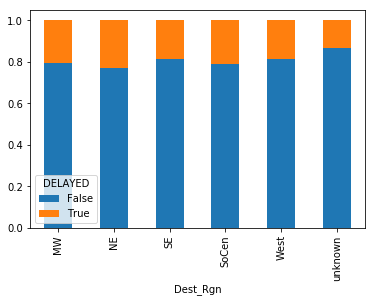

In [25]:
delays_rgn = pd.crosstab([ df4['Dest_Rgn']],df4.DELAYED.astype(bool))

delays_rate_rgn = delays_rgn.div(delays_rgn.sum(1).astype(float),axis=0)
delays_rate_rgn.plot(kind='bar',stacked=True)

Two things jump out about this data. The first is that all regions have similar delay rates. The second, is that while it is not a huge difference, the Northeast (NE) does have a higher delay rate than any other region.

While we saw above that "congestion" does not appear to be a driver of delays, the fact that much of the traffic in the Northeast is made up by the three large New York airports (EWR, LGA, JFK), and those are three of the busiest airports in the world, it certainly can't help. Another likely contributing factor is weather. Cold weather can result in delays to wait for storms to pass or because planes have to go through a "de-icing" process.

The final look with our new features will be at the length-of-haul (LOH) groupings.

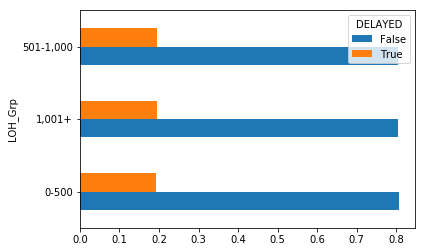

In [26]:
delays_loh = pd.crosstab([ df4['LOH_Grp']],df4.DELAYED.astype(bool))

delays_rate_loh = delays_loh.div(delays_loh.sum(1).astype(float),axis=0)
delays_rate_loh.plot(kind='barh')

The green bars represent the percent of fligts which we delayed. The chart above suggests that length-of-haul may not have a meaningful impact on the likelihood of a flight being delayed.

Lastly, we want to know if the flights are spread across the length-of-haul groupings or concentrated in one or two of them

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a2fe80>], dtype=object)

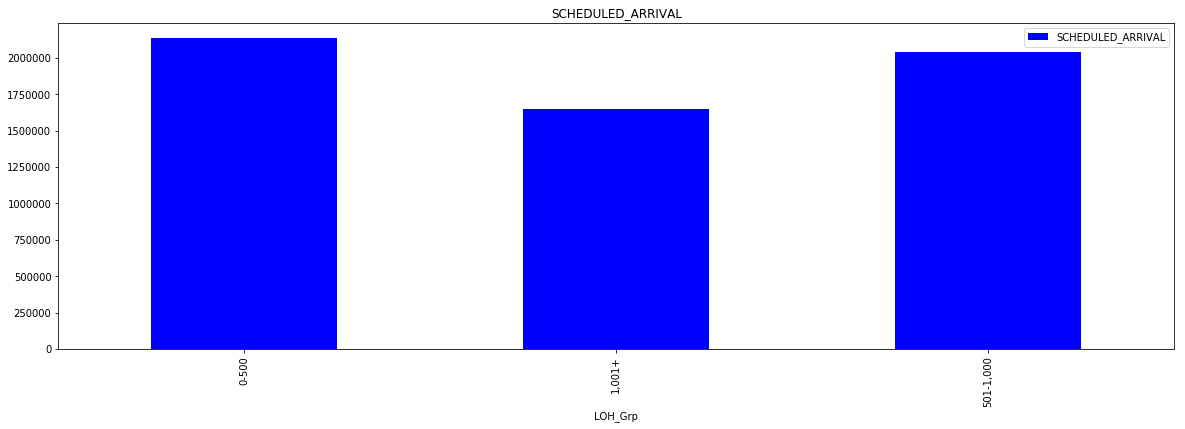

In [27]:
df_loh = pd.DataFrame(df4.groupby('LOH_Grp').count()['SCHEDULED_ARRIVAL'])

df_loh.plot(kind='bar',subplots=True,color='B',figsize=(20,6),legend=True)

As shown above, the largest grouping is 0-500 miles, but each grouping has a large number of observations in it.